Import of Python libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [23]:
data = pd.read_csv("train.csv", sep="|")

Initial data exploration

In [6]:
data.shape

(1879, 10)

In [14]:
data['trustLevel'] = data['trustLevel'].astype('category')
data.dtypes

trustLevel                   category
totalScanTimeInSeconds          int64
grandTotal                    float64
lineItemVoids                   int64
scansWithoutRegistration        int64
quantityModifications           int64
scannedLineItemsPerSecond     float64
valuePerSecond                float64
lineItemVoidsPerPosition      float64
fraud                           int64
dtype: object

In [52]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


Only 104 frauds out of 1879 instances

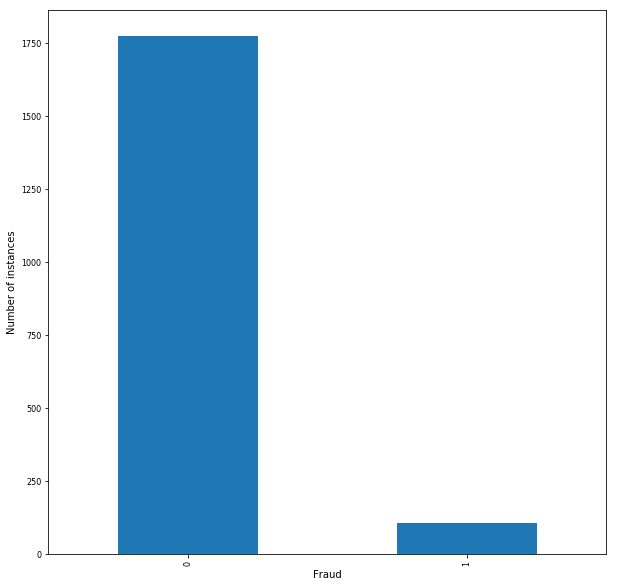

In [58]:
data.fraud.value_counts().plot.bar()
plt.xlabel('Fraud')
plt.ylabel('Number of instances')
plt.savefig('Plot.jpg')

There are no NULL values in the data
-> no imputation is needed

In [6]:
data.isnull().values.any()

False

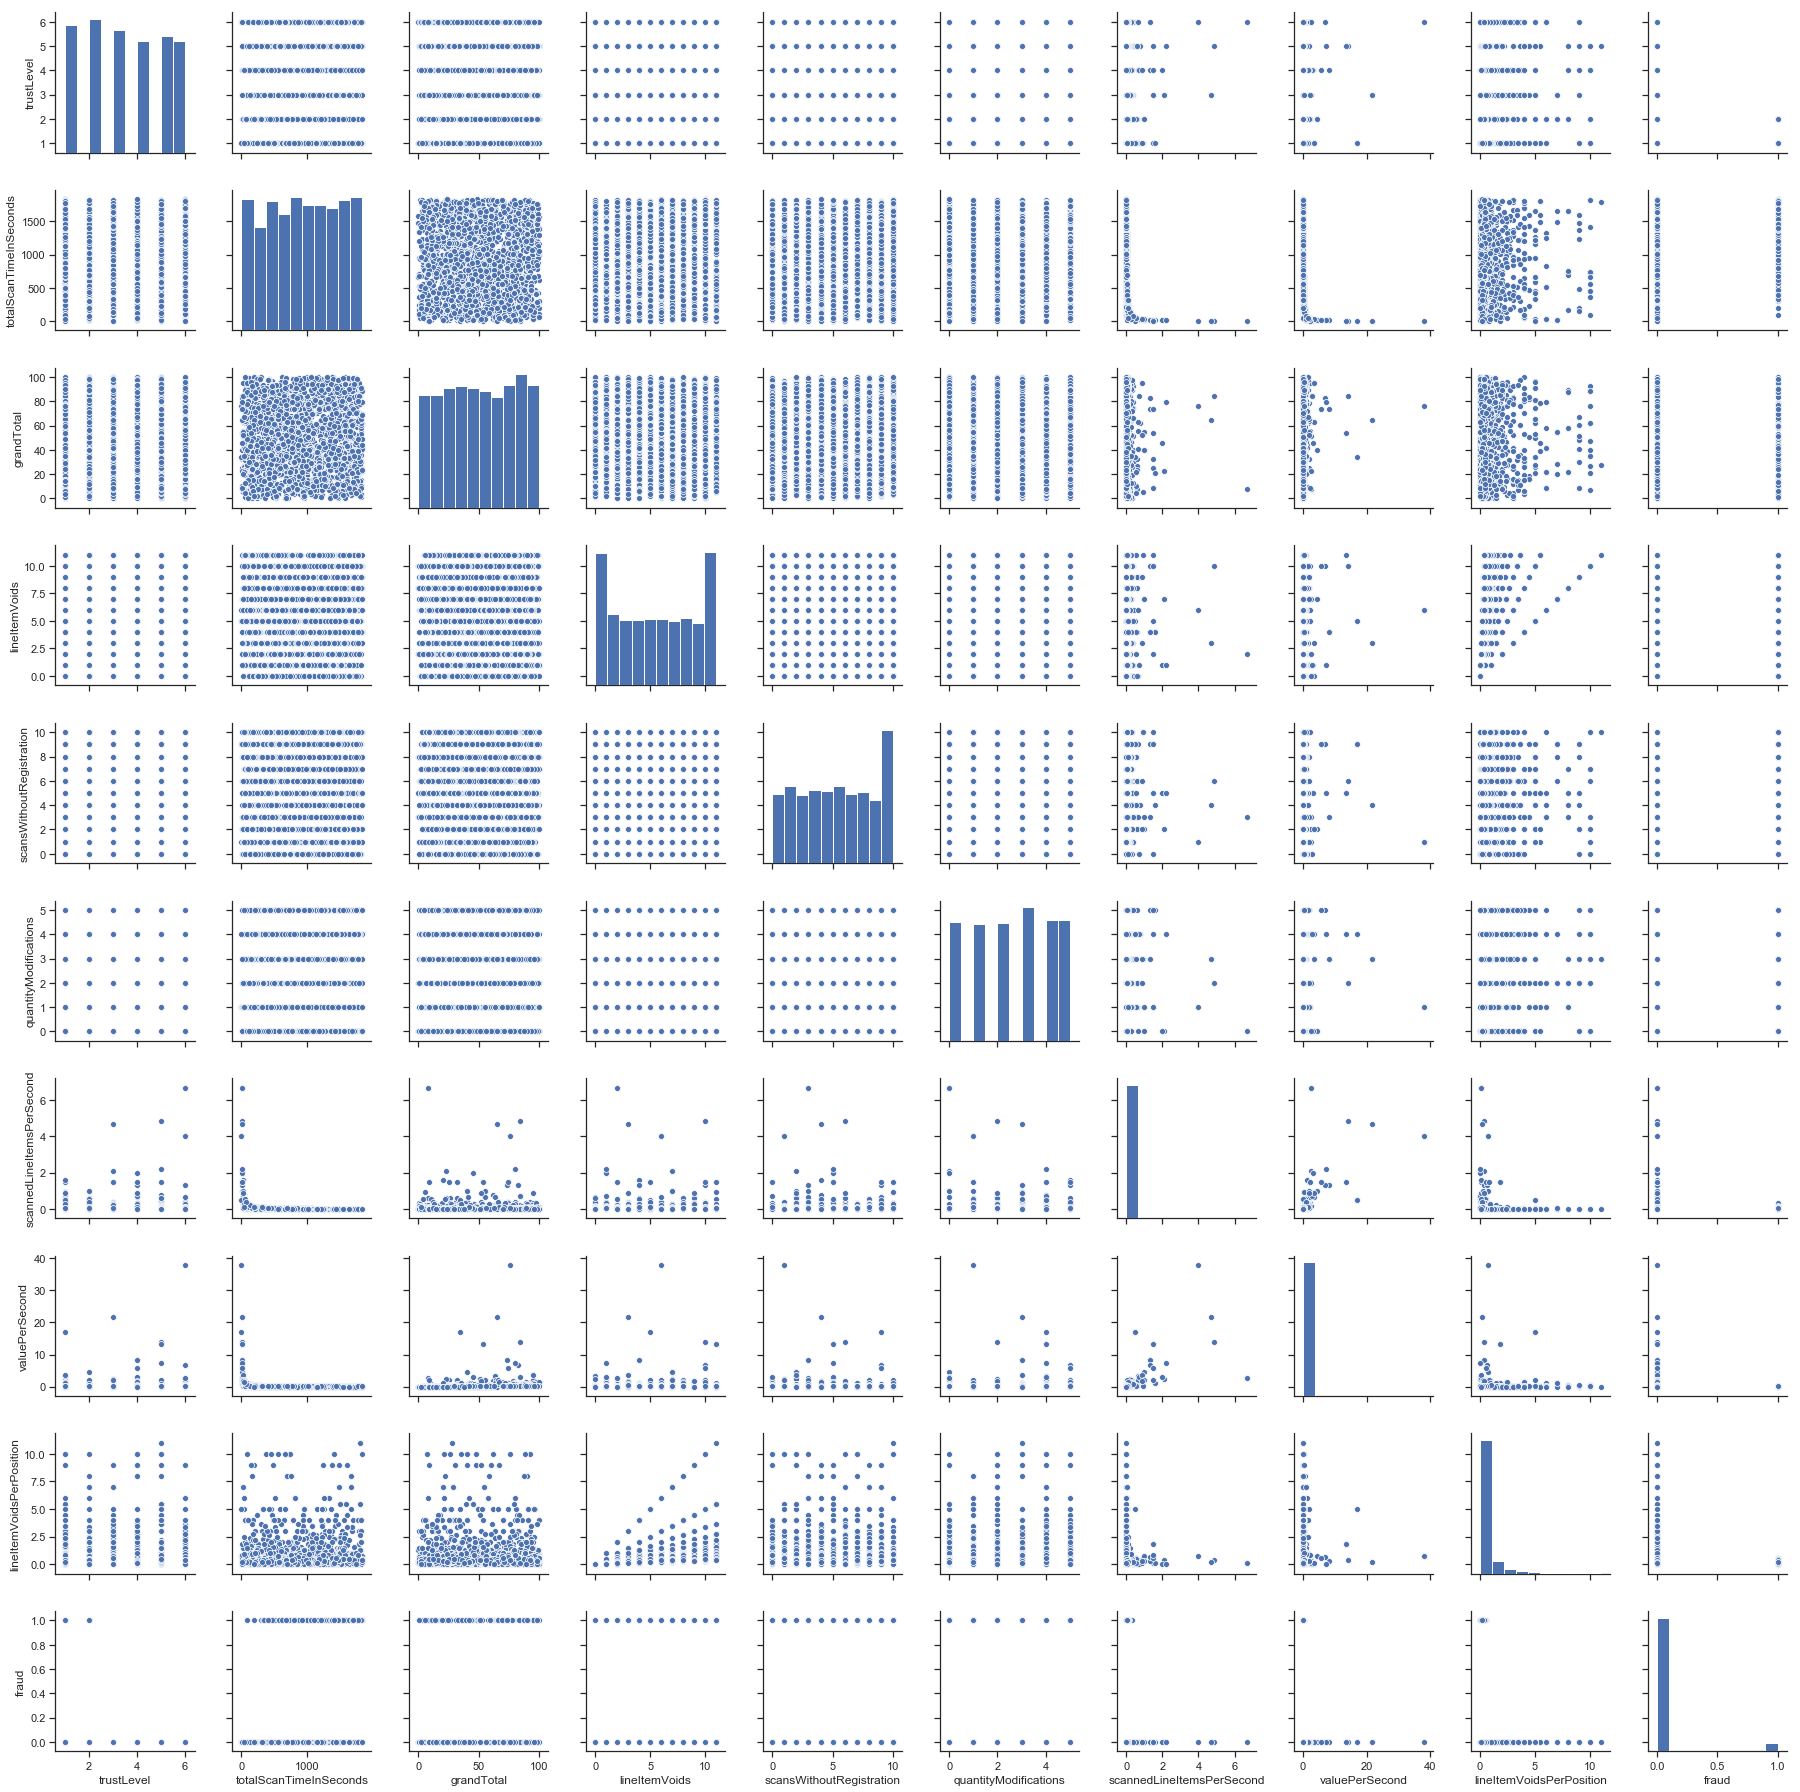

In [42]:
sns.pairplot(data)

In [83]:
data.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,scannedLineItems,pricePerLineItem
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765,0.006357,0.008270
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414,0.009769,-0.019434
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421,-0.006955,0.328316
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496,0.021647,-0.025732
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123,-0.026529,0.002975
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864,-0.035571,0.014195
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085,0.100724,-0.061587
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873,-0.022396,0.033083
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116,-0.519169,0.610629
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000,0.298423,-0.100765


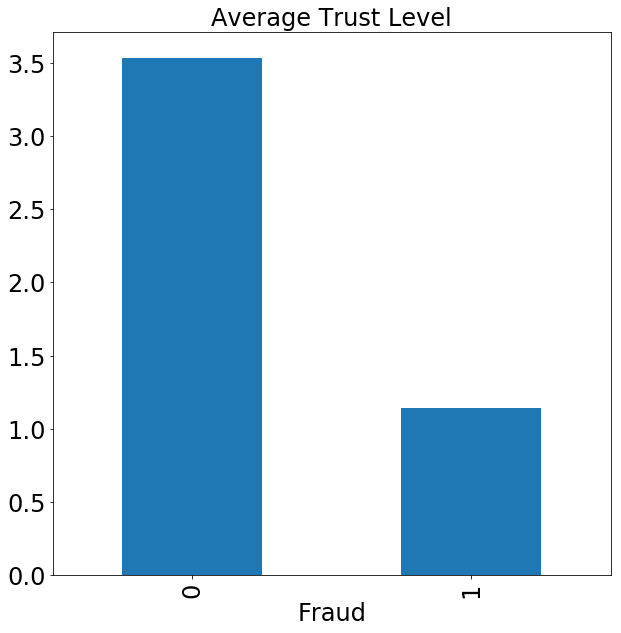

In [76]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
data.groupby(['fraud']).mean()['trustLevel'].plot.bar()
plt.xlabel('Fraud', fontsize=24)
#plt.ylabel('Average Trust Level', fontsize=18)
plt.title('Average Trust Level', fontsize=24)
plt.savefig('Trust Level Fraud.jpg')

Text(0, 0.5, 'Average Trust Level')

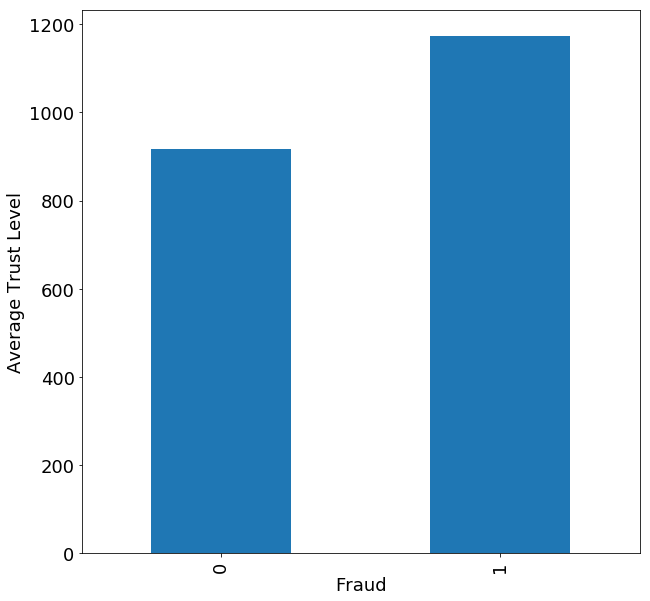

In [65]:
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
data.groupby(['fraud']).mean()['totalScanTimeInSeconds'].plot.bar()
plt.xlabel('Fraud', fontsize=18)
plt.ylabel('Average Scan Time In Seconds', fontsize=18)
#plt.title('Trust Level as an indicator for fraud')
#plt.savefig('Trust Level Fraud.jpg')

Text(0.5, 1.0, 'Average Grand Total')

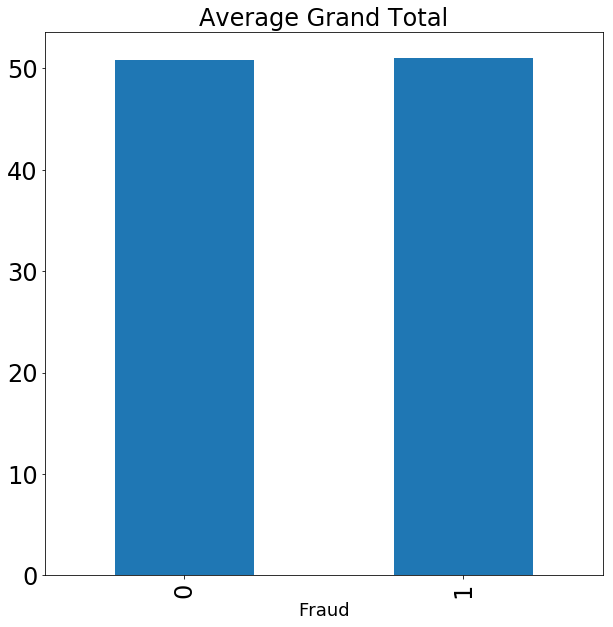

In [75]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
data.groupby(['fraud']).mean()['grandTotal'].plot.bar()
plt.xlabel('Fraud', fontsize=18)
#plt.ylabel('Average Grand Total', fontsize=24)
plt.title('Average Grand Total', fontsize=24)
#plt.savefig('Trust Level Fraud.jpg')

Text(0, 0.5, 'Average Line Item Voids')

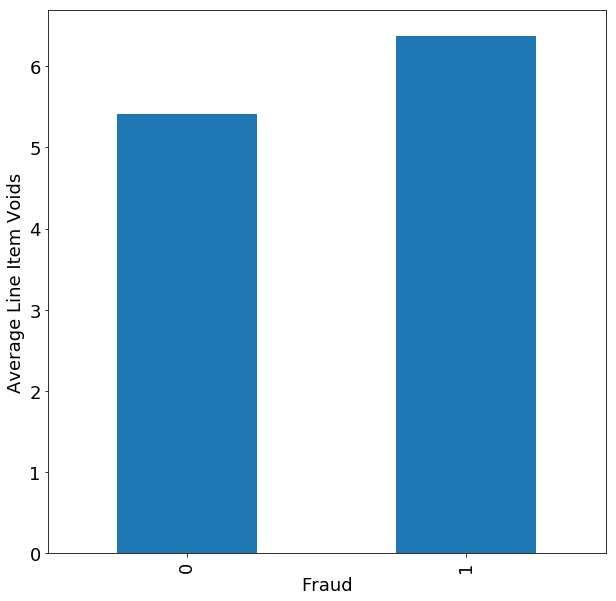

In [68]:
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
data.groupby(['fraud']).mean()['lineItemVoids'].plot.bar()
plt.xlabel('Fraud', fontsize=18)
plt.ylabel('Average Line Item Voids', fontsize=18)
#plt.title('Trust Level as an indicator for fraud')
#plt.savefig('Trust Level Fraud.jpg')

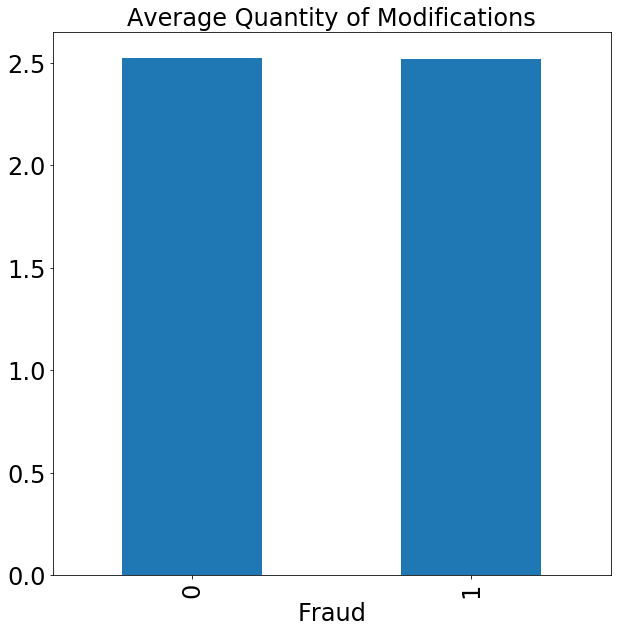

In [77]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
data.groupby(['fraud']).mean()['quantityModifications'].plot.bar()
plt.xlabel('Fraud', fontsize=24)
#plt.ylabel('Average Quantity Modifications', fontsize=18)
plt.title('Average Quantity of Modifications', fontsize=24)
plt.savefig('Quantity Modification Fraud.jpg')

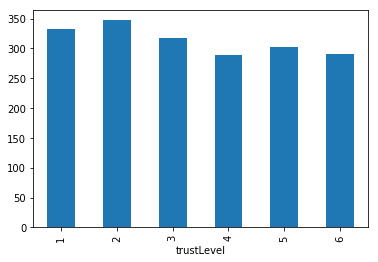

In [20]:
data.groupby(['trustLevel']).size().plot.bar()

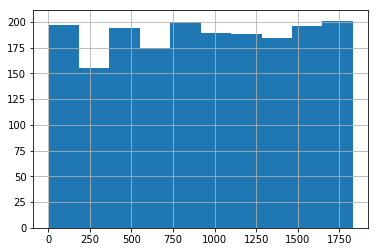

In [22]:
data['totalScanTimeInSeconds'].hist()

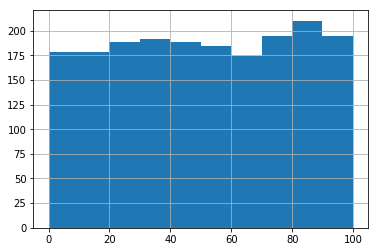

In [23]:
data['grandTotal'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x29c9cd08d68>,
 'caps': [<matplotlib.lines.Line2D at 0x29c9cd156d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c9cd08c18>],
 'medians': [<matplotlib.lines.Line2D at 0x29c9cd15d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c9cd15e48>],
 'means': []}

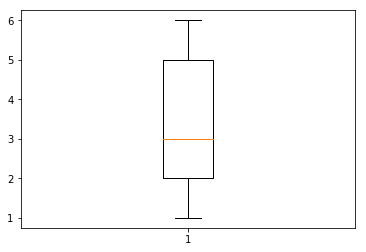

In [21]:
plt.boxplot(data['trustLevel'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d22085ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x2d2208644e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d22085aa20>],
 'medians': [<matplotlib.lines.Line2D at 0x2d220864b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d220864eb8>],
 'means': []}

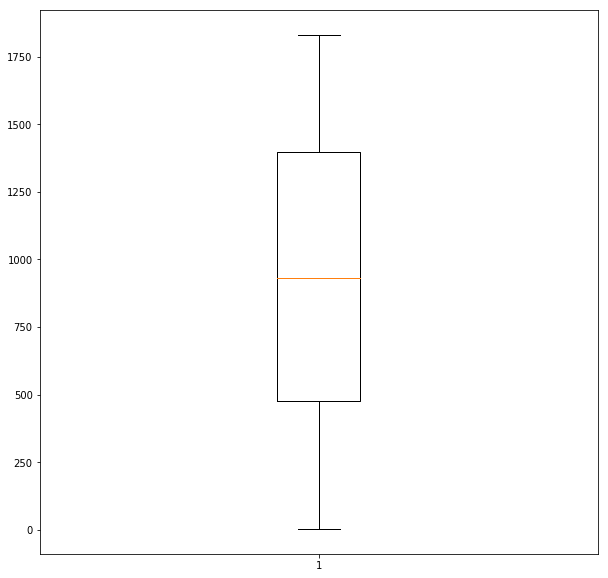

In [33]:
plt.boxplot(data['totalScanTimeInSeconds'])

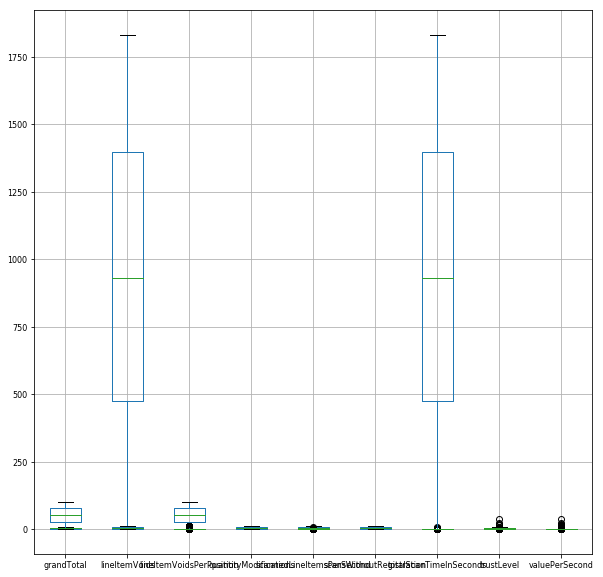

In [57]:
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
data.boxplot()

data[data.columns.difference(['fraud'])].boxplot()
plt.savefig('Plot.jpg')

In [10]:
np.std(data)

trustLevel                     1.708949
totalScanTimeInSeconds       530.003551
grandTotal                    28.932500
lineItemVoids                  3.450251
scansWithoutRegistration       3.138862
quantityModifications          1.695021
scannedLineItemsPerSecond      0.278438
valuePerSecond                 1.241804
lineItemVoidsPerPosition       1.326888
fraud                          0.228659
dtype: float64

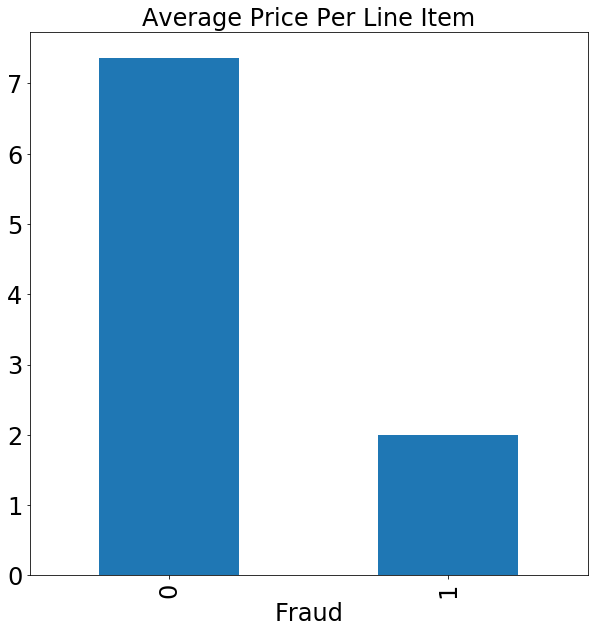

In [84]:
data['scannedLineItems'] = data['scannedLineItemsPerSecond'] * data['totalScanTimeInSeconds']
data['pricePerLineItem'] = data['grandTotal'] / data['scannedLineItems']

plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
data.groupby(['fraud']).mean()['pricePerLineItem'].plot.bar()
plt.xlabel('Fraud', fontsize=24)
#plt.ylabel('Average Quantity Modifications', fontsize=18)
plt.title('Average Price Per Line Item', fontsize=24)
plt.savefig('Price Per Line Item Fraud.jpg')